# Import the libraries

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import statsmodels.api as sm
#import mplcursors
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

# Load the dataset

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [3]:



df = pd.read_csv('C:\\NachuMohan\\Saint_Peters_University\\GA_Summer2020\\Health-Literacy-COVID19\\Income\\clean data\\COVIDUnemployment.csv')

In [4]:
df.head(5)

,State,cases,deaths,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018
0,Alabama,387786,14345,2216627,2130845,85782,3.9,49881
1,Alaska,18316,367,352662,329901,22761,6.5,74912
2,Arizona,426614,18857,3422583,3260518,162065,4.7,59079
3,Arkansas,161569,3301,1353305,1303995,49310,3.6,47094
4,California,2664110,102387,19280821,18460725,820096,4.3,75250


In [6]:
df.shape

(51, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
State                           51 non-null object
cases                           51 non-null int64
deaths                          51 non-null int64
Civilian_labor_force_2018       51 non-null int64
Employed_2018                   51 non-null int64
Unemployed_2018                 51 non-null int64
Unemployment_rate_2018          51 non-null float64
Median_Household_Income_2018    51 non-null int64
dtypes: float64(1), int64(6), object(1)
memory usage: 3.3+ KB


In [9]:
df.isnull().sum()

State                           0
cases                           0
deaths                          0
Civilian_labor_force_2018       0
Employed_2018                   0
Unemployed_2018                 0
Unemployment_rate_2018          0
Median_Household_Income_2018    0
dtype: int64

In [11]:
df.describe()


,cases,deaths,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000,51.000000,51.000000
mean,1.056306e+06,5.861198e+04,3.164487e+06,3.041220e+06,123266.784314,3.794118,62036.529412
std,2.249183e+06,1.579360e+05,3.569005e+06,3.422712e+06,147350.196414,0.830521,10516.402800
min,1.831600e+04,2.810000e+02,2.914280e+05,2.800760e+05,8804.000000,2.500000,44038.000000
25%,1.696980e+05,4.021000e+03,8.212015e+05,7.883060e+05,27425.500000,3.200000,55340.500000
50%,3.877860e+05,1.425100e+04,2.097202e+06,2.001995e+06,84967.000000,3.800000,60071.000000
75%,1.047118e+06,5.046050e+04,3.796251e+06,3.647934e+06,146783.500000,4.250000,70838.000000
max,1.504181e+07,1.081194e+06,1.928082e+07,1.846072e+07,820096.000000,6.500000,83076.000000


In [13]:
corr=df.corr()

In [15]:
corr

,cases,deaths,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018
cases,1.000000,0.990033,0.478687,0.478129,0.488209,0.112768,0.226888
deaths,0.990033,1.000000,0.385467,0.384831,0.397479,0.109790,0.199162
Civilian_labor_force_2018,0.478687,0.385467,1.000000,0.999987,0.993118,0.105594,0.135606
Employed_2018,0.478129,0.384831,0.999987,1.000000,0.992515,0.102431,0.135910
Unemployed_2018,0.488209,0.397479,0.993118,0.992515,1.000000,0.178296,0.127574
Unemployment_rate_2018,0.112768,0.109790,0.105594,0.102431,0.178296,1.000000,-0.057753
Median_Household_Income_2018,0.226888,0.199162,0.135606,0.135910,0.127574,-0.057753,1.000000


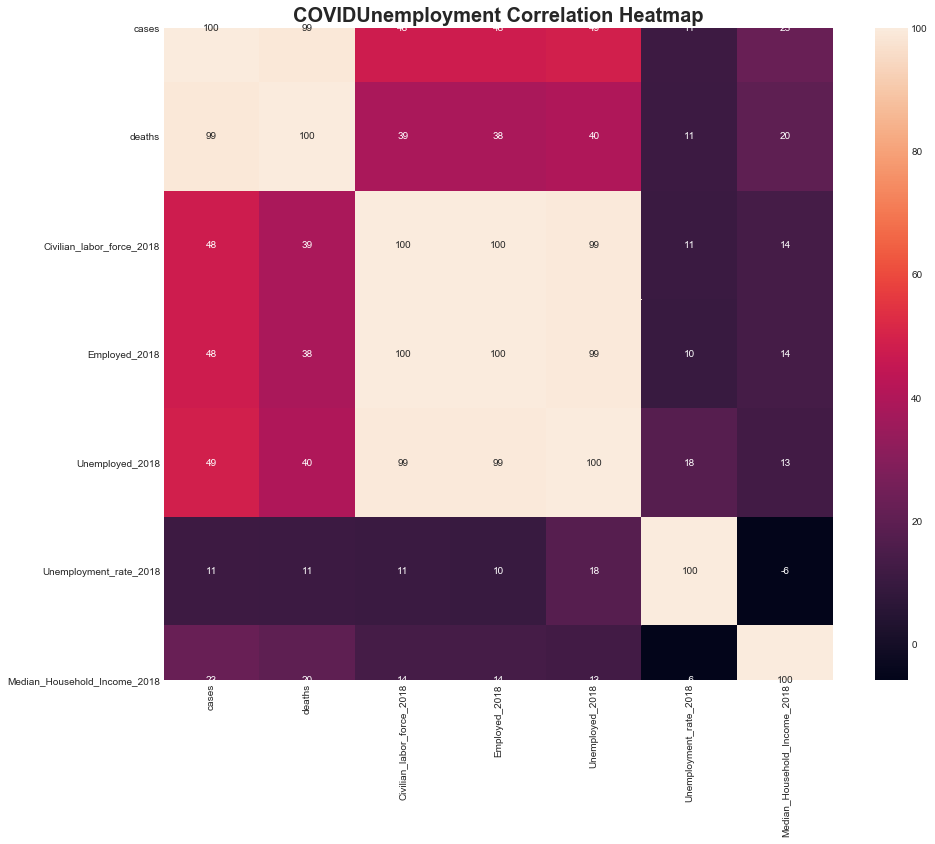

In [18]:
# Make the figsize 15 x 12
plt.figure(figsize=(15,12))

# Plot heatmap of annotated correlations
sns.heatmap(corr *100, annot=True, fmt = '.0f')

#Title
plt.title('COVIDUnemployment Correlation Heatmap', fontweight = 'bold', fontsize = 20);


# Histogram

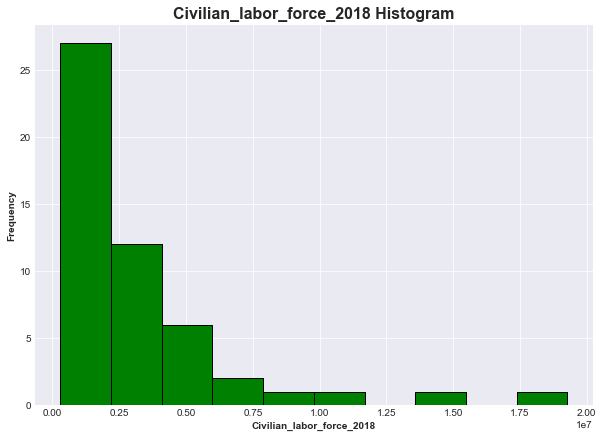

In [19]:
plt.style.use('seaborn-darkgrid')

df['Civilian_labor_force_2018'].plot(kind = 'hist', color = 'green', edgecolor = 'black', figsize = (10,7))
plt.title('Civilian_labor_force_2018 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Civilian_labor_force_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

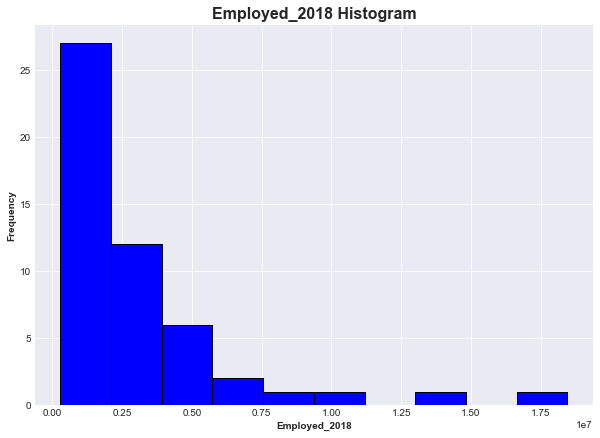

In [21]:
plt.style.use('seaborn-darkgrid')

df['Employed_2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Employed_2018 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employed_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

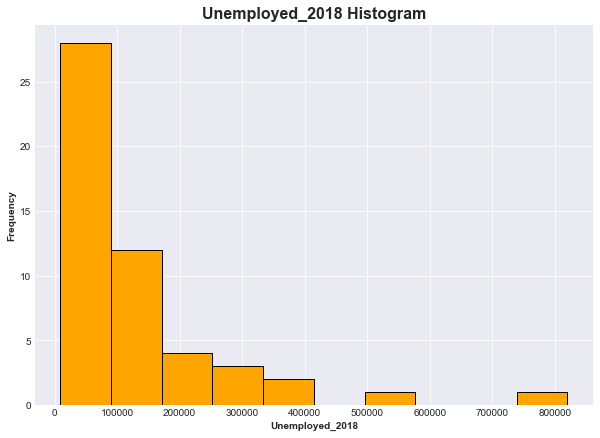

In [22]:
plt.style.use('seaborn-darkgrid')

df['Unemployed_2018'].plot(kind = 'hist', color = 'orange', edgecolor = 'black', figsize = (10,7))
plt.title('Unemployed_2018 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unemployed_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

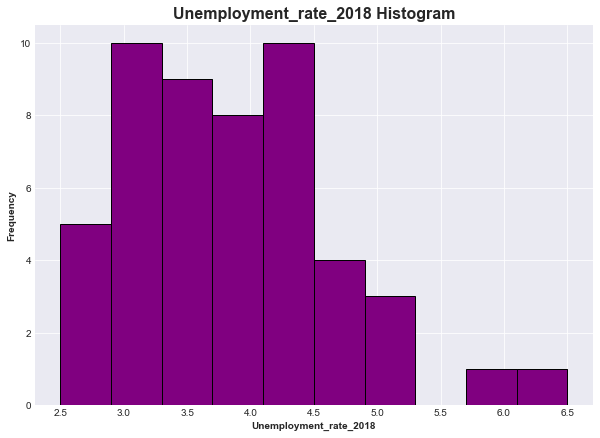

In [23]:
plt.style.use('seaborn-darkgrid')

df['Unemployment_rate_2018'].plot(kind = 'hist', color = 'purple', edgecolor = 'black', figsize = (10,7))
plt.title('Unemployment_rate_2018 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unemployment_rate_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

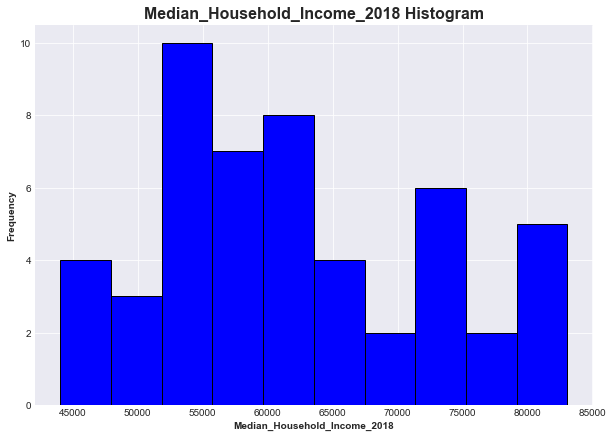

In [24]:
plt.style.use('seaborn-darkgrid')

df['Median_Household_Income_2018'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Median_Household_Income_2018 Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Median_Household_Income_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

# Violin Plot

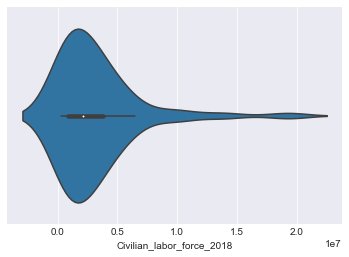

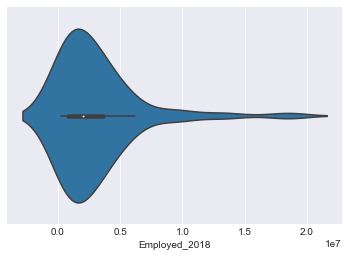

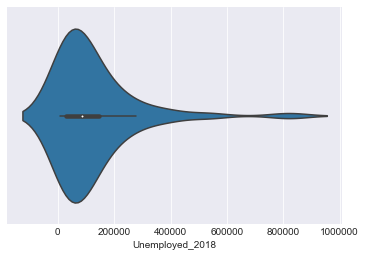

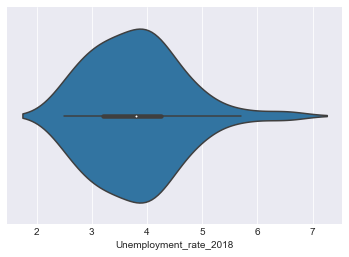

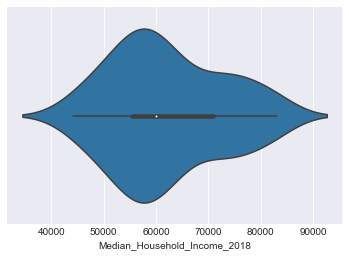

In [26]:
# Violin plot of Civilian_labor_force_2018
sns.violinplot(x='Civilian_labor_force_2018', data=df)
plt.show()

# Violin plot of Employed_2018
sns.violinplot(x='Employed_2018', data=df)
plt.show()

# Violin plot of Unemployed 2018
sns.violinplot(x='Unemployed_2018', data=df)
plt.show()

# Violin plot of Unemployment_rate_2018
sns.violinplot(x='Unemployment_rate_2018', data=df)
plt.show()

# Violin plot of Median_Household_Income_2018
sns.violinplot(x='Median_Household_Income_2018', data=df)
plt.show()

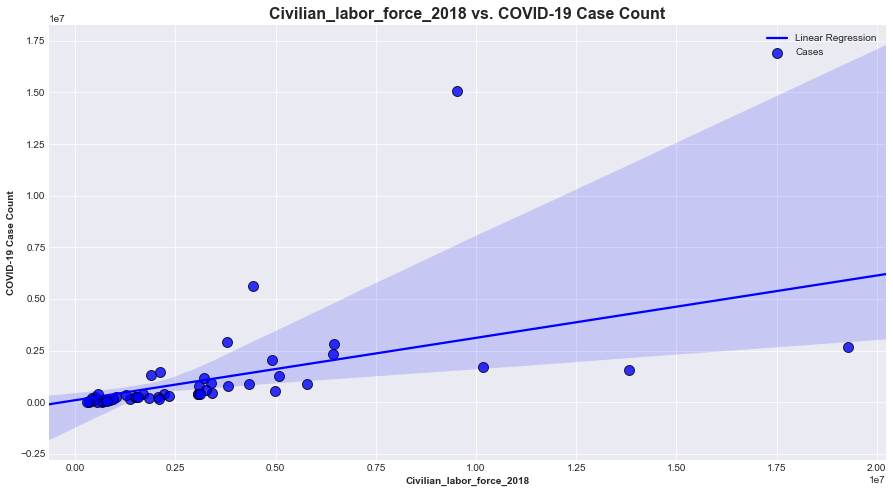

In [27]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Civilian_labor_force_2018', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Civilian_labor_force_2018 vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Civilian_labor_force_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [28]:
model1 = sm.OLS(df['cases'], df['Civilian_labor_force_2018']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.370
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                              29.34
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    1.74e-06
Time:                        10:37:31   Log-Likelihood:                         -811.19
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Civilian_labor_force_2018     0.3160      0.058      5.416      0.000       0.199       0.433
==============================================================================
Omnibus:                       85.114   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1532.397
Skew:                           4.516   Prob(JB):                         0.00
Kurtosis:                      28.290   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

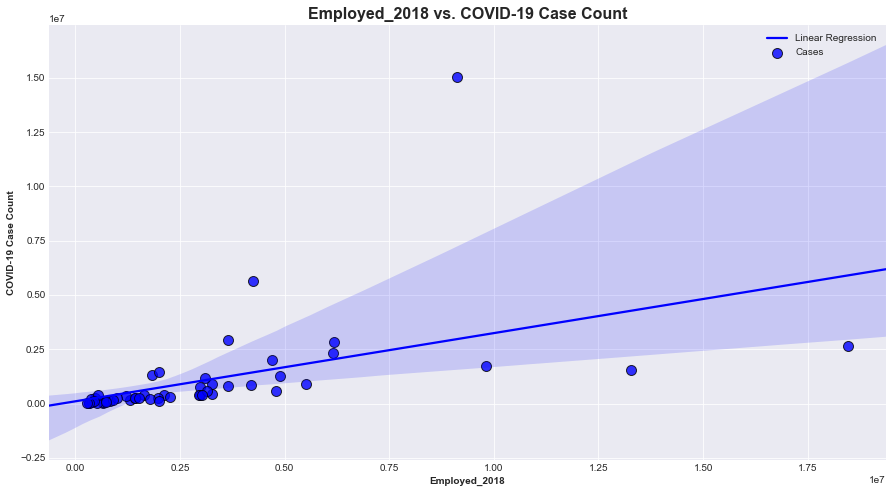

In [29]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Employed_2018', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Employed_2018 vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Employed_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [30]:
model2 = sm.OLS(df['cases'], df['Employed_2018']).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.369
Model:                            OLS   Adj. R-squared (uncentered):              0.357
Method:                 Least Squares   F-statistic:                              29.28
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    1.77e-06
Time:                        10:39:32   Log-Likelihood:                         -811.21
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Employed_2018     0.3290      0.061      5.411      0.000       0.207       0.451
==============================================================================
Omnibus:                       85.166   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1534.656
Skew:                           4.520   Prob(JB):                         0.00
Kurtosis:                      28.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

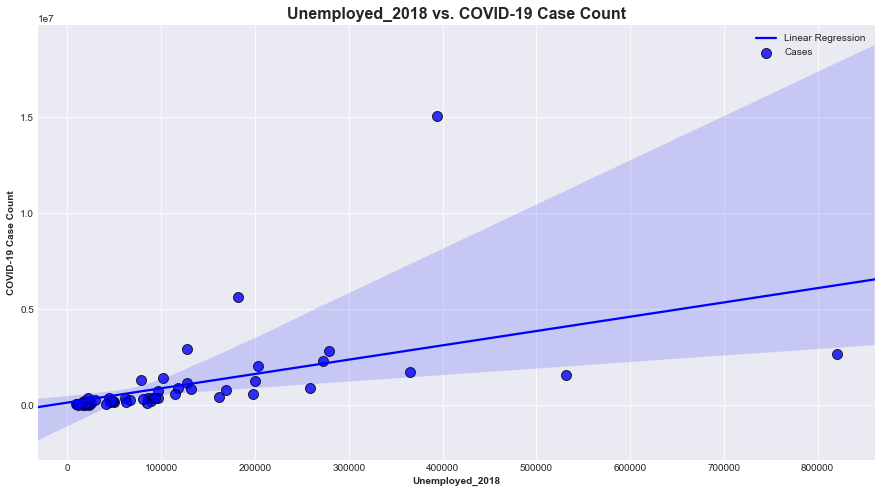

In [31]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Unemployed_2018', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Unemployed_2018 vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unemployed_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [32]:
model3 = sm.OLS(df['cases'], df['Unemployed_2018']).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.376
Model:                            OLS   Adj. R-squared (uncentered):              0.364
Method:                 Least Squares   F-statistic:                              30.18
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    1.32e-06
Time:                        10:39:45   Log-Likelihood:                         -810.92
No. Observations:                  51   AIC:                                      1624.
Df Residuals:                      50   BIC:                                      1626.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Unemployed_2018     7.9174      1.441      5.494      0.000       5.023      10.812
==============================================================================
Omnibus:                       83.650   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1467.633
Skew:                           4.398   Prob(JB):                         0.00
Kurtosis:                      27.765   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

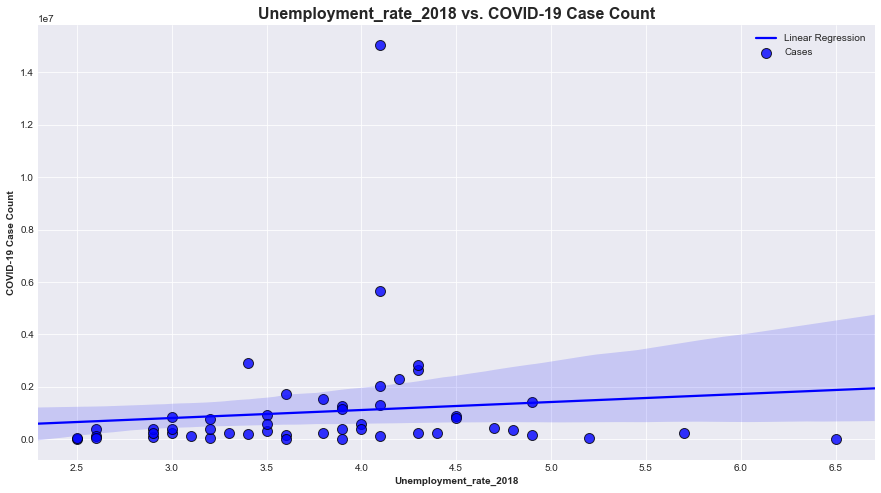

In [33]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Unemployment_rate_2018', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Unemployment_rate_2018 vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Unemployment_rate_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

In [34]:
model4 = sm.OLS(df['cases'], df['Unemployment_rate_2018']).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.194
Model:                            OLS   Adj. R-squared (uncentered):              0.178
Method:                 Least Squares   F-statistic:                              12.03
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                     0.00109
Time:                        10:39:56   Log-Likelihood:                         -817.47
No. Observations:                  51   AIC:                                      1637.
Df Residuals:                      50   BIC:                                      1639.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Unemployment_rate_2018  2.796e+05   8.06e+04      3.469      0.001    1.18e+05    4.42e+05
==============================================================================
Omnibus:                       91.242   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1868.591
Skew:                           5.011   Prob(JB):                         0.00
Kurtosis:                      30.909   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

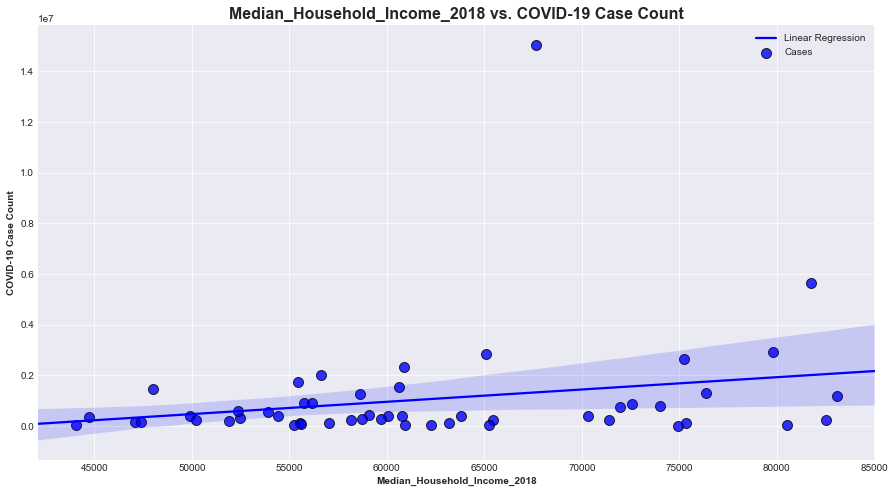

In [35]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Median_Household_Income_2018', y = 'cases', data = df, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Median_Household_Income_2018 vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Median_Household_Income_2018', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();



In [36]:
model5 = sm.OLS(df['cases'], df['Median_Household_Income_2018']).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.208
Model:                            OLS   Adj. R-squared (uncentered):              0.193
Method:                 Least Squares   F-statistic:                              13.17
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    0.000669
Time:                        10:40:07   Log-Likelihood:                         -817.00
No. Observations:                  51   AIC:                                      1636.
Df Residuals:                      50   BIC:                                      1638.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Median_Household_Income_2018    17.8903      4.930      3.629      0.001       7.988      27.793
==============================================================================
Omnibus:                       92.650   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1992.662
Skew:                           5.113   Prob(JB):                         0.00
Kurtosis:                      31.864   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
model6 = sm.OLS(df['cases'], df[['Civilian_labor_force_2018', 'Employed_2018','Unemployed_2018',
                                 'Unemployment_rate_2018', 
                                 'Median_Household_Income_2018']]).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.344
Method:                 Least Squares   F-statistic:                              7.688
Date:                Tue, 02 Jun 2020   Prob (F-statistic):                    7.50e-05
Time:                        10:42:46   Log-Likelihood:                         -810.13
No. Observations:                  51   AIC:                                      1628.
Df Residuals:                      47   BIC:                                      1636.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Civilian_labor_force_2018        7.4378      5.730      1.298      0.201      -4.089      18.965
Employed_2018                   -8.1152      6.493     -1.250      0.218     -21.178       4.948
Unemployed_2018                 15.5530     12.223      1.272      0.209      -9.036      40.142
Unemployment_rate_2018       -2.665e+05   3.02e+05     -0.883      0.382   -8.74e+05    3.41e+05
Median_Household_Income_2018    21.2704     19.458      1.093      0.280     -17.874      60.415
==============================================================================
Omnibus:                       86.044   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1650.640
Skew:                           4.554   Prob(JB):                         0.00
Kurtosis:                      29.340   Cond. No.                     3.35e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.97e-18. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

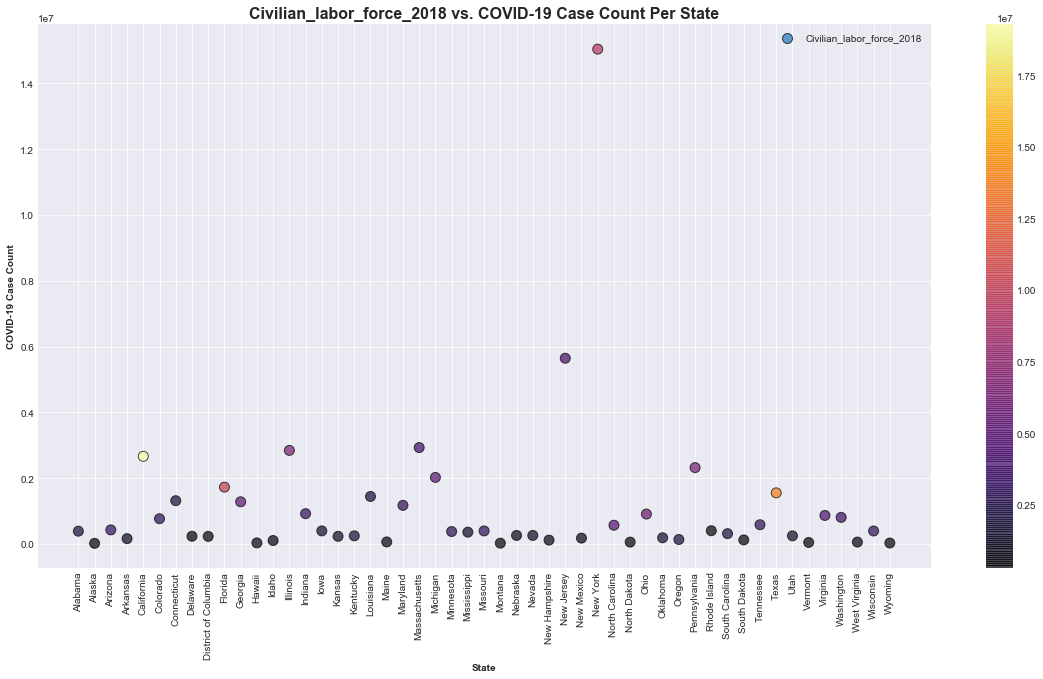

In [40]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Civilian_labor_force_2018'], cmap = 'inferno')
plt.title('Civilian_labor_force_2018 vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Civilian_labor_force_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

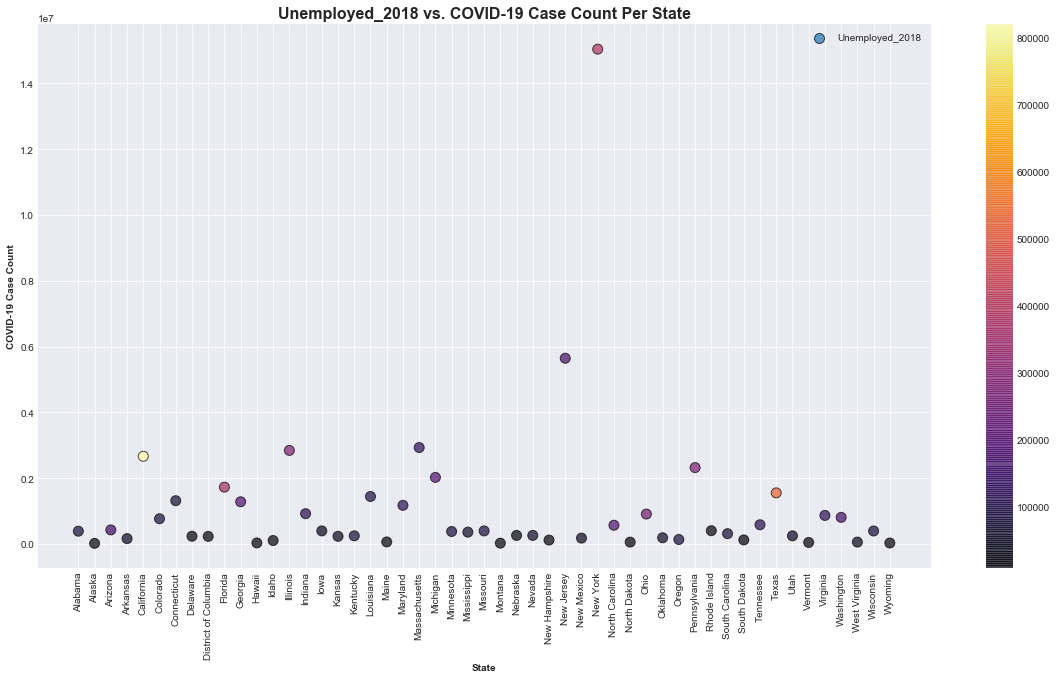

In [41]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Unemployed_2018'], cmap = 'inferno')
plt.title('Unemployed_2018 vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Unemployed_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

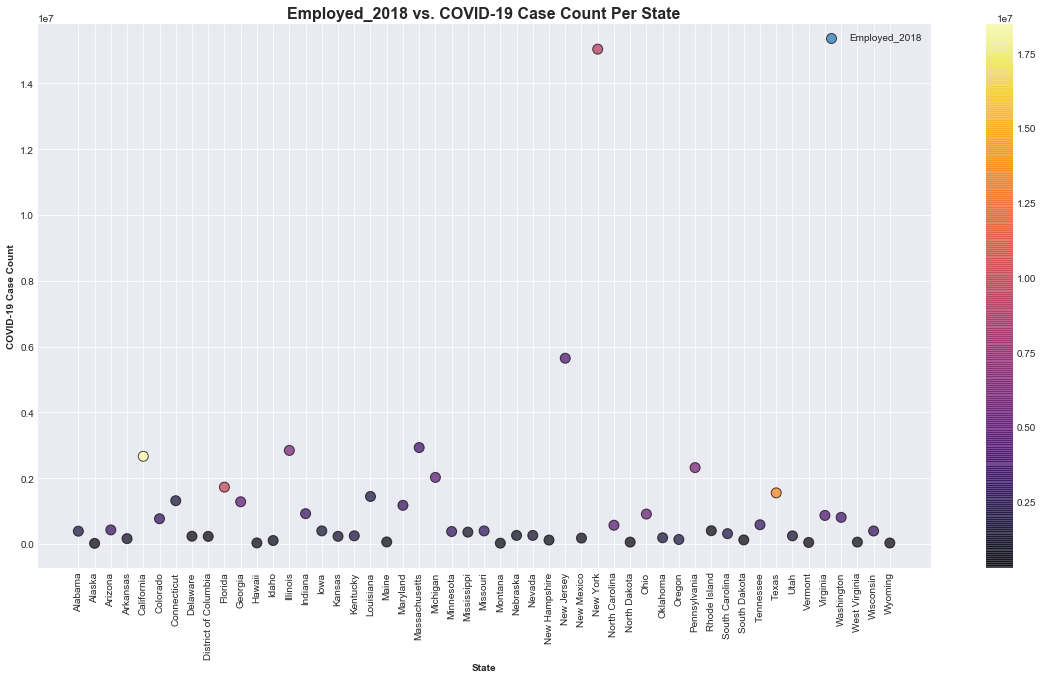

In [42]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Employed_2018'], cmap = 'inferno')
plt.title('Employed_2018 vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Employed_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

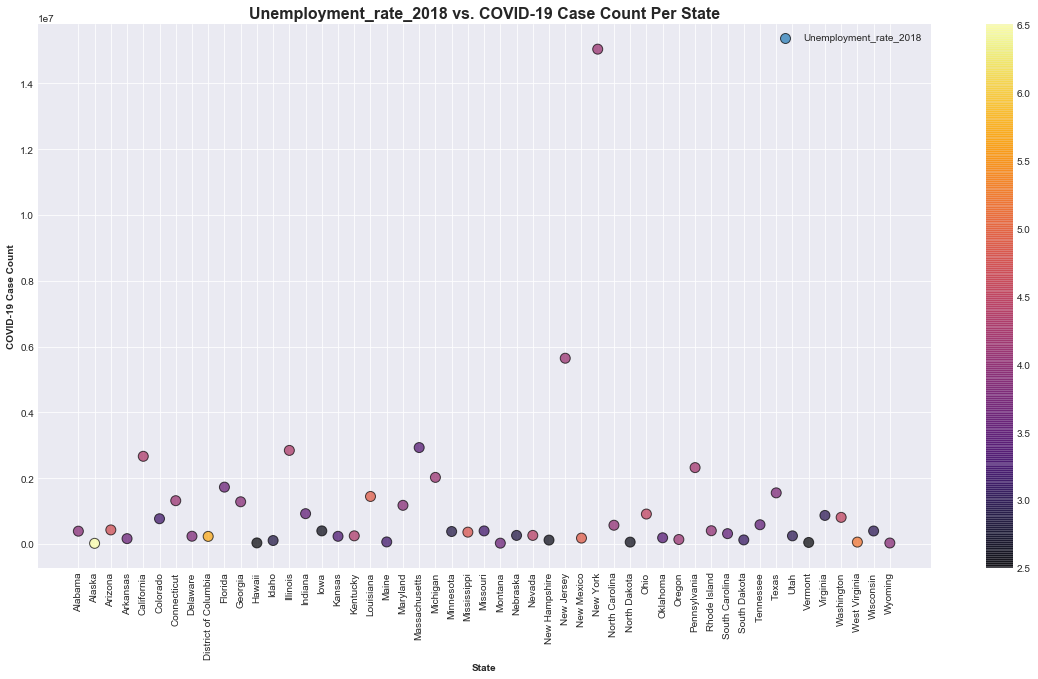

In [43]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Unemployment_rate_2018'], cmap = 'inferno')
plt.title('Unemployment_rate_2018 vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Unemployment_rate_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

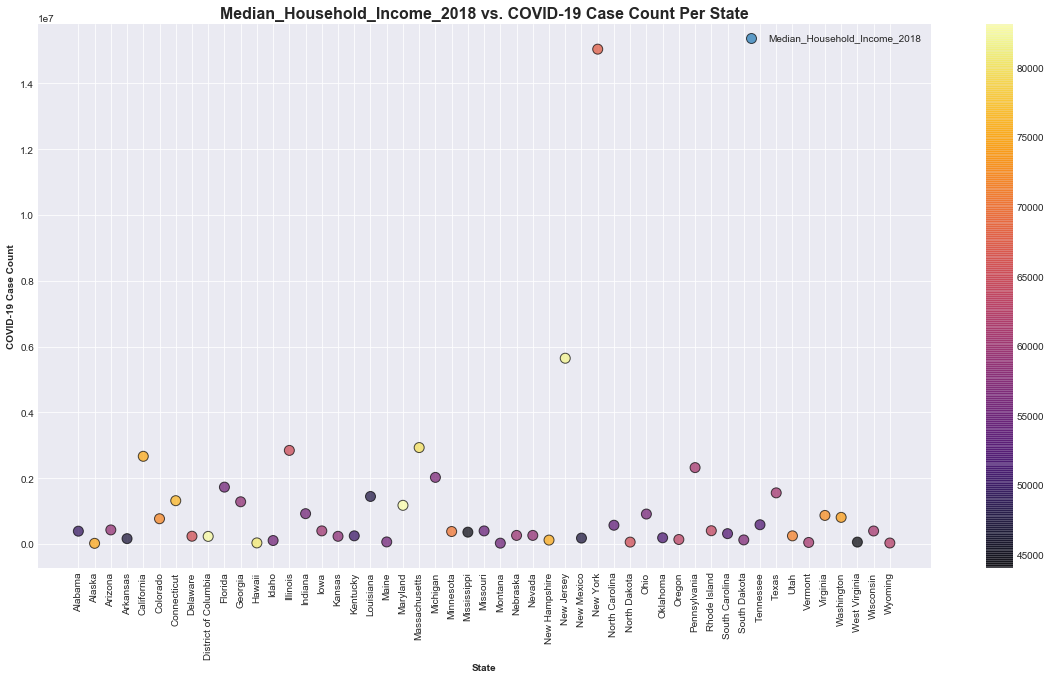

In [44]:
fig = plt.figure(figsize = (20,10))

x = df['State'] 
y = df['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = df['Median_Household_Income_2018'], cmap = 'inferno')
plt.title('Median_Household_Income_2018 vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Median_Household_Income_2018'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();

In [52]:
X = df[['Civilian_labor_force_2018']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

IncomeModel = LinearRegression()
IncomeModel.fit(train_X, train_y)

predictions = IncomeModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1399603.3669834281
MSE Value: 13048655226857.855
RMS Value: 3612292.2399575943
R2 Score: 0.14989901019913332


In [51]:
X = df[['Employed_2018']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

IncomeModel = LinearRegression()
IncomeModel.fit(train_X, train_y)

predictions = IncomeModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1399053.490635853
MSE Value: 13062158364839.055
RMS Value: 3614160.8105947715
R2 Score: 0.14901930031610955


In [50]:
X = df[['Unemployed_2018']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

IncomeModel = LinearRegression()
IncomeModel.fit(train_X, train_y)

predictions = IncomeModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1422913.317616521
MSE Value: 12792972231706.176
RMS Value: 3576726.4686730206
R2 Score: 0.16655638703029607


In [49]:
X = df[['Unemployment_rate_2018']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

IncomeModel = LinearRegression()
IncomeModel.fit(train_X, train_y)

predictions = IncomeModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1762452.729450654
MSE Value: 16166370382633.71
RMS Value: 4020742.5163312447
R2 Score: -0.05321561684588172


In [48]:
X = df[['Median_Household_Income_2018']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

IncomeModel = LinearRegression()
IncomeModel.fit(train_X, train_y)

predictions = IncomeModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1777544.632316773
MSE Value: 15793401458174.021
RMS Value: 3974091.274514719
R2 Score: -0.028917231584269176


# MultiLinear Regression

In [53]:
X = df[['Civilian_labor_force_2018','Employed_2018','Unemployed_2018','Unemployment_rate_2018','Median_Household_Income_2018']]

y = df[['cases']]

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 0)

IncomeModel = LinearRegression()
IncomeModel.fit(train_X, train_y)

predictions = IncomeModel.predict(test_X)

MAE = mean_absolute_error(test_y, predictions)
MSE = mean_squared_error(test_y, predictions)
RMS = sqrt(mean_squared_error(test_y, predictions))
R2Score = r2_score(test_y, predictions)

print('MAE Value:', MAE)
print('MSE Value:', MSE)
print('RMS Value:', RMS)
print('R2 Score:', R2Score)

MAE Value: 1640216.0696619027
MSE Value: 12586085223879.592
RMS Value: 3547687.3063842016
R2 Score: 0.1800347759579396
